# Importing Required Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [53]:
df = pd.read_csv('taxi_trip_pricing.csv')
df

,Total_Distance,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


# Data Visualization

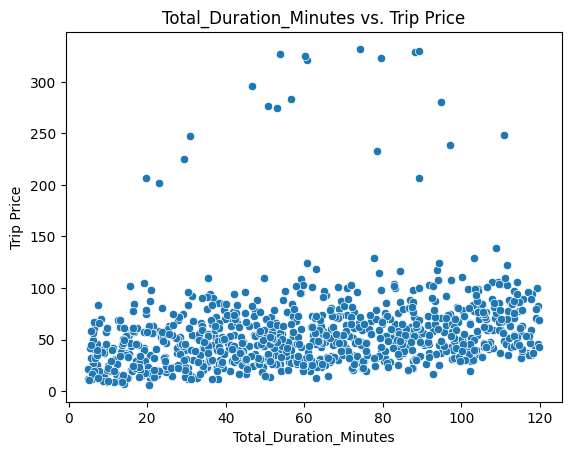

In [54]:
sns.scatterplot(data=df, x="Total_Duration_Minutes", y="Trip_Price")
plt.title("Total_Duration_Minutes vs. Trip Price")
plt.xlabel("Total_Duration_Minutes")
plt.ylabel("Trip Price")
plt.show()

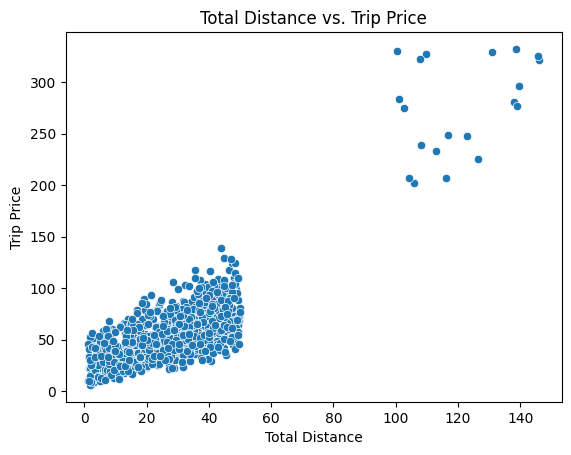

In [55]:
sns.scatterplot(data=df, x="Total_Distance", y="Trip_Price")
plt.title("Total Distance vs. Trip Price")
plt.xlabel("Total Distance")
plt.ylabel("Trip Price")
plt.show()

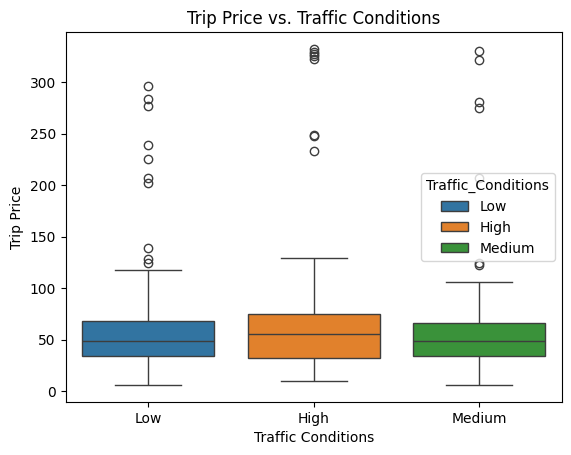

In [56]:
# Box plot (price vs. traffic)
sns.boxplot(data=df, x="Traffic_Conditions", y="Trip_Price",hue = 'Traffic_Conditions')
plt.title("Trip Price vs. Traffic Conditions")
plt.xlabel("Traffic Conditions")
plt.ylabel("Trip Price")
plt.show()

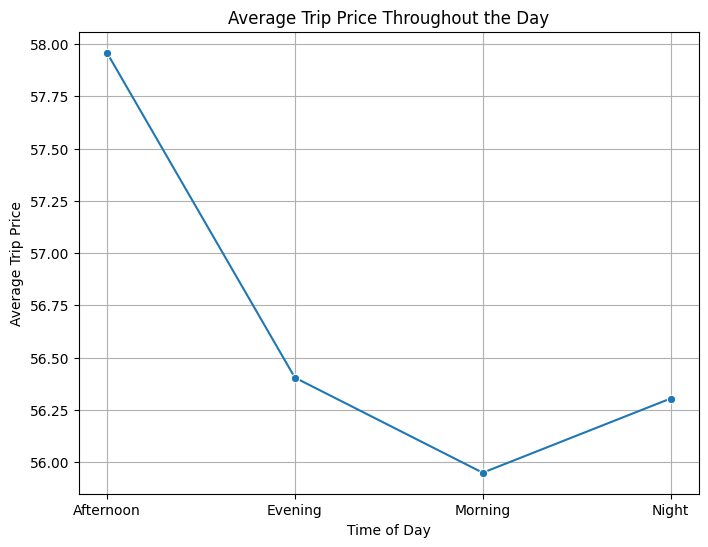

In [57]:
average_price_by_time = df.groupby('Time_of_Day')['Trip_Price'].mean().dropna()

plt.figure(figsize=(8, 6))
sns.lineplot(x=average_price_by_time.index, y=average_price_by_time.values, marker='o')
plt.title('Average Trip Price Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Trip Price')
plt.grid(True)
plt.show()

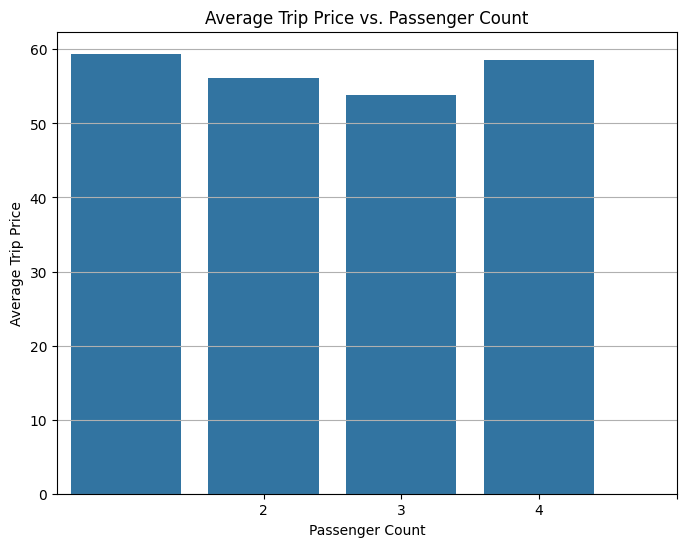

In [58]:
average_price_by_passenger = df.groupby('Passenger_Count')['Trip_Price'].mean().dropna()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_price_by_passenger.index.astype(int), y=average_price_by_passenger.values )
plt.title('Average Trip Price vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Price')
plt.xticks(average_price_by_passenger.index.astype(int)) # Ensure integer x-axis ticks
plt.grid(axis='y')
plt.show()

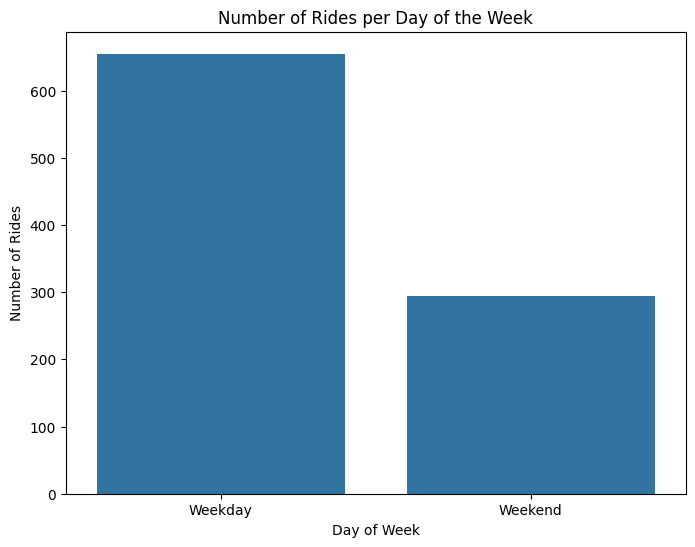

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Day_of_Week') 
plt.title('Number of Rides per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()

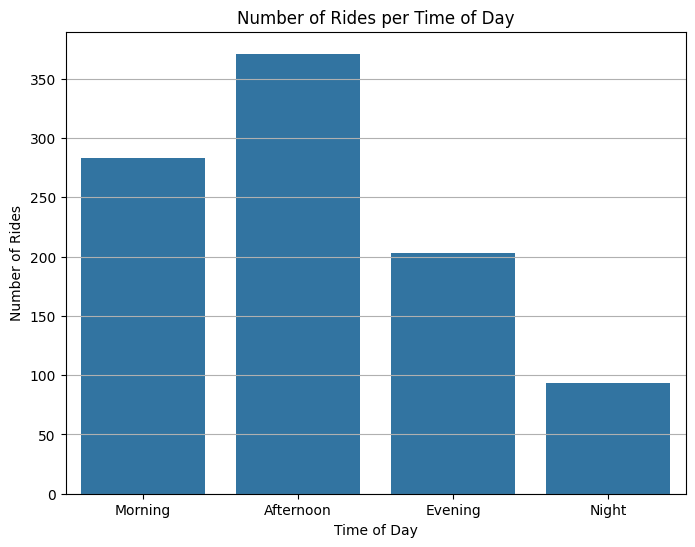

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Time_of_Day') 
plt.title('Number of Rides per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.show()

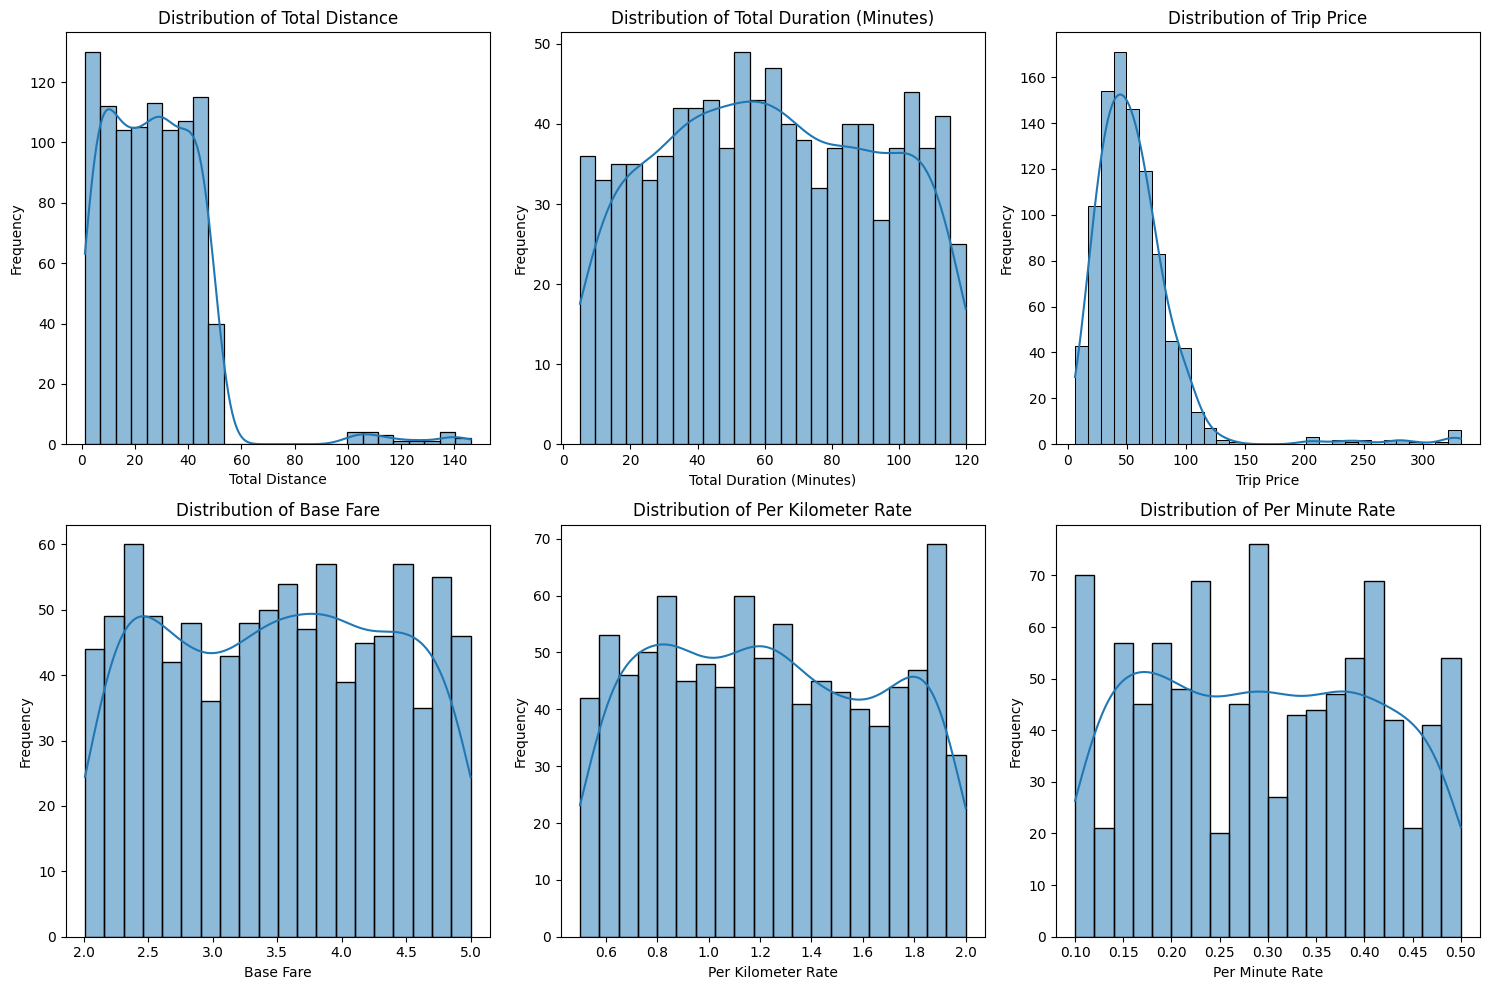

In [61]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Total_Distance'].dropna(), bins=25, kde=True)
plt.title('Distribution of Total Distance')
plt.xlabel('Total Distance')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(df['Total_Duration_Minutes'].dropna(), bins=25, kde=True)
plt.title('Distribution of Total Duration (Minutes)')
plt.xlabel('Total Duration (Minutes)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(df['Trip_Price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Trip Price')
plt.xlabel('Trip Price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(df['Base_Fare'].dropna(), bins=20, kde=True)
plt.title('Distribution of Base Fare')
plt.xlabel('Base Fare')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(df['Per_Km_Rate'].dropna(), bins=20, kde=True)
plt.title('Distribution of Per Kilometer Rate')
plt.xlabel('Per Kilometer Rate')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(df['Per_Minute_Rate'].dropna(), bins=20, kde=True)
plt.title('Distribution of Per Minute Rate')
plt.xlabel('Per Minute Rate')
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

# Prepare the Dataset for ML Training

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total_Distance          950 non-null    float64
 1   Time_of_Day             950 non-null    object 
 2   Day_of_Week             950 non-null    object 
 3   Passenger_Count         950 non-null    float64
 4   Traffic_Conditions      950 non-null    object 
 5   Weather                 950 non-null    object 
 6   Base_Fare               950 non-null    float64
 7   Per_Km_Rate             950 non-null    float64
 8   Per_Minute_Rate         950 non-null    float64
 9   Total_Duration_Minutes  950 non-null    float64
 10  Trip_Price              951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [63]:
df = df.dropna(subset=['Trip_Price'])
df

,Total_Distance,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [64]:
df.describe()

,Total_Distance,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price
count,901.000000,903.000000,907.000000,907.000000,902.000000,905.000000,951.000000
mean,27.190998,2.479513,3.497100,1.229934,0.293902,62.044144,56.874773
std,20.155134,1.100983,0.866729,0.429958,0.115404,32.321578,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.630000,2.000000,2.730000,0.850000,0.190000,35.590000,33.742650
50%,25.870000,2.000000,3.510000,1.220000,0.290000,61.570000,50.074500
75%,38.680000,3.000000,4.230000,1.610000,0.390000,89.210000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
numerical_cols = ['Base_Fare','Per_Km_Rate','Per_Minute_Rate']
# columns with less standard deviation and mean is close to median
for col in numerical_cols:
    mean_val = df[col].mean()  # Calculate the mean
    df[col].fillna(mean_val, inplace=True)  

In [ ]:
numerical_cols2 = ['Total_Distance','Total_Duration_Minutes']
#columns whose std is relatively high compared to mean
for col in numerical_cols2:
    median_val = df[col].median()  # Calculate the median
    df[col] = df[col].fillna(median_val)  

In [ ]:
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    mode_val = df[col].mode()[0]  # Calculate the mode
    df[col] = df[col].fillna(mode_val) 

In [68]:
df.Trip_Price.corr(df.Passenger_Count)

np.float64(-0.014222960208985159)

In [69]:
df.Trip_Price.corr(df.Per_Km_Rate)

np.float64(0.26359826288445537)

In [70]:
df.Trip_Price.corr(df.Per_Minute_Rate)

np.float64(0.1341536707214918)

In [71]:
df.Trip_Price.corr(df.Total_Duration_Minutes)

np.float64(0.21937953832307328)

In [72]:
df.Trip_Price.corr(df.Total_Distance)

np.float64(0.8418181905935728)

In [73]:
df.Trip_Price.corr(df.Base_Fare)

np.float64(0.03515553268543292)

In [74]:
val = {'Weekday': 0, 'Weekend':1}
df.Day_of_Week = df.Day_of_Week.map(val)
df

C:\Users\misht\AppData\Local\Temp\ipykernel_8416\1674053126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Day_of_Week = df.Day_of_Week.map(val)


,Total_Distance,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price
0,19.35,Morning,0,3.0,Low,Clear,3.56,0.800000,0.320000,53.82,36.2624
2,36.87,Evening,1,1.0,High,Clear,2.70,1.210000,0.150000,37.27,52.9032
3,30.33,Evening,0,4.0,Low,Clear,3.48,0.510000,0.150000,116.81,36.4698
4,25.87,Evening,0,3.0,High,Clear,2.93,0.630000,0.320000,22.64,15.6180
5,8.64,Afternoon,1,2.0,Medium,Clear,2.55,1.710000,0.480000,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,1,4.0,Medium,Clear,2.39,0.620000,0.490000,58.39,34.4049
996,45.95,Night,0,4.0,Medium,Clear,3.12,0.610000,0.293902,61.96,62.1295
997,7.70,Morning,0,3.0,Low,Rain,2.08,1.780000,0.293902,54.18,33.1236
998,47.56,Morning,0,1.0,Low,Clear,2.67,0.820000,0.170000,114.94,61.2090


In [75]:
df.Trip_Price.corr(df.Day_of_Week)

np.float64(-0.030136779864287505)

In [76]:
df.Traffic_Conditions.value_counts()

Traffic_Conditions
Low       424
Medium    355
High      172
Name: count, dtype: int64

In [77]:
val = {'Low': 0, 'Medium':1, 'High' :2}
df.Traffic_Conditions = df.Traffic_Conditions.map(val)
df

C:\Users\misht\AppData\Local\Temp\ipykernel_8416\1750722862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Traffic_Conditions = df.Traffic_Conditions.map(val)


,Total_Distance,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price
0,19.35,Morning,0,3.0,0,Clear,3.56,0.800000,0.320000,53.82,36.2624
2,36.87,Evening,1,1.0,2,Clear,2.70,1.210000,0.150000,37.27,52.9032
3,30.33,Evening,0,4.0,0,Clear,3.48,0.510000,0.150000,116.81,36.4698
4,25.87,Evening,0,3.0,2,Clear,2.93,0.630000,0.320000,22.64,15.6180
5,8.64,Afternoon,1,2.0,1,Clear,2.55,1.710000,0.480000,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,1,4.0,1,Clear,2.39,0.620000,0.490000,58.39,34.4049
996,45.95,Night,0,4.0,1,Clear,3.12,0.610000,0.293902,61.96,62.1295
997,7.70,Morning,0,3.0,0,Rain,2.08,1.780000,0.293902,54.18,33.1236
998,47.56,Morning,0,1.0,0,Clear,2.67,0.820000,0.170000,114.94,61.2090


In [78]:
df.Trip_Price.corr(df.Traffic_Conditions)

np.float64(0.06932604434166438)

In [79]:
val = {'Afternoon': 3, 'Morning':2, 'Evening' :1, 'Night': 0}
df.Time_of_Day = df.Time_of_Day.map(val)
df

C:\Users\misht\AppData\Local\Temp\ipykernel_8416\2255714856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Time_of_Day = df.Time_of_Day.map(val)


,Total_Distance,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,0,Clear,3.56,0.800000,0.320000,53.82,36.2624
2,36.87,1,1,1.0,2,Clear,2.70,1.210000,0.150000,37.27,52.9032
3,30.33,1,0,4.0,0,Clear,3.48,0.510000,0.150000,116.81,36.4698
4,25.87,1,0,3.0,2,Clear,2.93,0.630000,0.320000,22.64,15.6180
5,8.64,3,1,2.0,1,Clear,2.55,1.710000,0.480000,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,3,1,4.0,1,Clear,2.39,0.620000,0.490000,58.39,34.4049
996,45.95,0,0,4.0,1,Clear,3.12,0.610000,0.293902,61.96,62.1295
997,7.70,2,0,3.0,0,Rain,2.08,1.780000,0.293902,54.18,33.1236
998,47.56,2,0,1.0,0,Clear,2.67,0.820000,0.170000,114.94,61.2090


In [80]:
df.Trip_Price.corr(df.Time_of_Day)

np.float64(0.01513992690365159)

In [81]:
df

,Total_Distance,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,0,Clear,3.56,0.800000,0.320000,53.82,36.2624
2,36.87,1,1,1.0,2,Clear,2.70,1.210000,0.150000,37.27,52.9032
3,30.33,1,0,4.0,0,Clear,3.48,0.510000,0.150000,116.81,36.4698
4,25.87,1,0,3.0,2,Clear,2.93,0.630000,0.320000,22.64,15.6180
5,8.64,3,1,2.0,1,Clear,2.55,1.710000,0.480000,89.33,60.2028
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,3,1,4.0,1,Clear,2.39,0.620000,0.490000,58.39,34.4049
996,45.95,0,0,4.0,1,Clear,3.12,0.610000,0.293902,61.96,62.1295
997,7.70,2,0,3.0,0,Rain,2.08,1.780000,0.293902,54.18,33.1236
998,47.56,2,0,1.0,0,Clear,2.67,0.820000,0.170000,114.94,61.2090


In [82]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()
encode.fit(df[['Weather']])
encode.categories_

[array(['Clear', 'Rain', 'Snow'], dtype=object)]

In [83]:
one_hot = encode.transform(df[['Weather']]).toarray()
one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
df[['Clear','Rain','Snow']] = one_hot
df.drop('Weather', axis=1, inplace=True)

In [85]:
df

,Total_Distance,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Total_Duration_Minutes,Trip_Price,Clear,Rain,Snow
0,19.35,2,0,3.0,0,3.56,0.800000,0.320000,53.82,36.2624,1.0,0.0,0.0
2,36.87,1,1,1.0,2,2.70,1.210000,0.150000,37.27,52.9032,1.0,0.0,0.0
3,30.33,1,0,4.0,0,3.48,0.510000,0.150000,116.81,36.4698,1.0,0.0,0.0
4,25.87,1,0,3.0,2,2.93,0.630000,0.320000,22.64,15.6180,1.0,0.0,0.0
5,8.64,3,1,2.0,1,2.55,1.710000,0.480000,89.33,60.2028,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,3,1,4.0,1,2.39,0.620000,0.490000,58.39,34.4049,1.0,0.0,0.0
996,45.95,0,0,4.0,1,3.12,0.610000,0.293902,61.96,62.1295,1.0,0.0,0.0
997,7.70,2,0,3.0,0,2.08,1.780000,0.293902,54.18,33.1236,0.0,1.0,0.0
998,47.56,2,0,1.0,0,2.67,0.820000,0.170000,114.94,61.2090,1.0,0.0,0.0


In [86]:
df.Trip_Price.corr(df.Rain)

np.float64(0.03879290447319726)

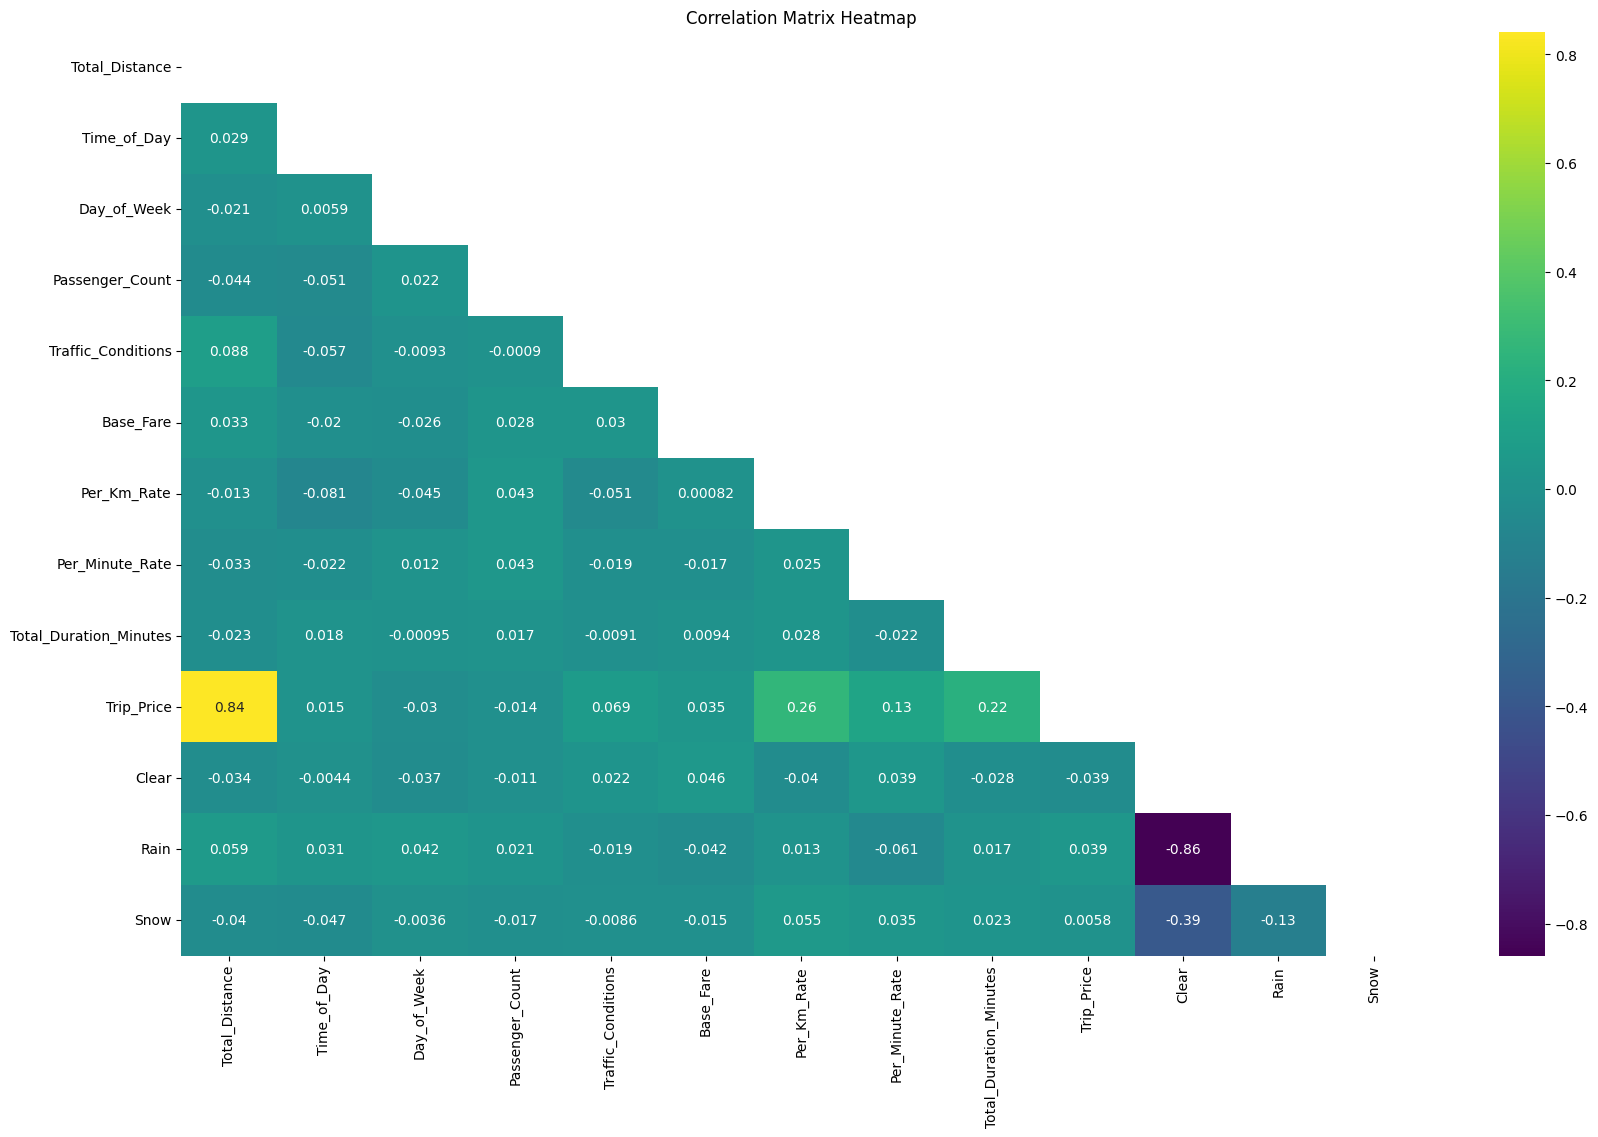

In [87]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangle
mask_matrix = np.triu(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(20, 12))  
sns.heatmap(corr_matrix, 
            cmap='viridis',  
            annot=True,      # Display correlation coefficients in the cells
            mask=mask_matrix) # Apply the mask
plt.title('Correlation Matrix Heatmap')
plt.show()

# Train & Evaluate Different Models - LinearRegression, KNeighborsRegressor and RandomForestRegressor

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total_Distance          951 non-null    float64
 1   Time_of_Day             951 non-null    int64  
 2   Day_of_Week             951 non-null    int64  
 3   Passenger_Count         903 non-null    float64
 4   Traffic_Conditions      951 non-null    int64  
 5   Base_Fare               951 non-null    float64
 6   Per_Km_Rate             951 non-null    float64
 7   Per_Minute_Rate         951 non-null    float64
 8   Total_Duration_Minutes  951 non-null    float64
 9   Trip_Price              951 non-null    float64
 10  Clear                   951 non-null    float64
 11  Rain                    951 non-null    float64
 12  Snow                    951 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 104.0 KB


In [90]:
# df_cleaned = df.drop('Passenger_Count', axis =1) 
# dropping this column of comparatively least significance to predict Trip_Price
# df_cleaned.info()

In [91]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [92]:
def percentage_error(y_true, y_pred):
    """Calculates the Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)


In [93]:
from sklearn.model_selection import train_test_split
inputs, targets = df[['Total_Distance','Time_of_Day','Day_of_Week','Traffic_Conditions','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Total_Duration_Minutes','Rain']], df['Trip_Price']
X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.2, random_state=42
)

In [102]:
# create and train model
model = LinearRegression().fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)

# compute the loss
loss = rmse(y_test, predictions)
print('Loss: ',loss)

Loss:  16.91268704336478


C:\Users\misht\AppData\Local\Temp\ipykernel_8416\2193484418.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, max_value], [0, max_value], 'r--', color='red', linewidth=2)


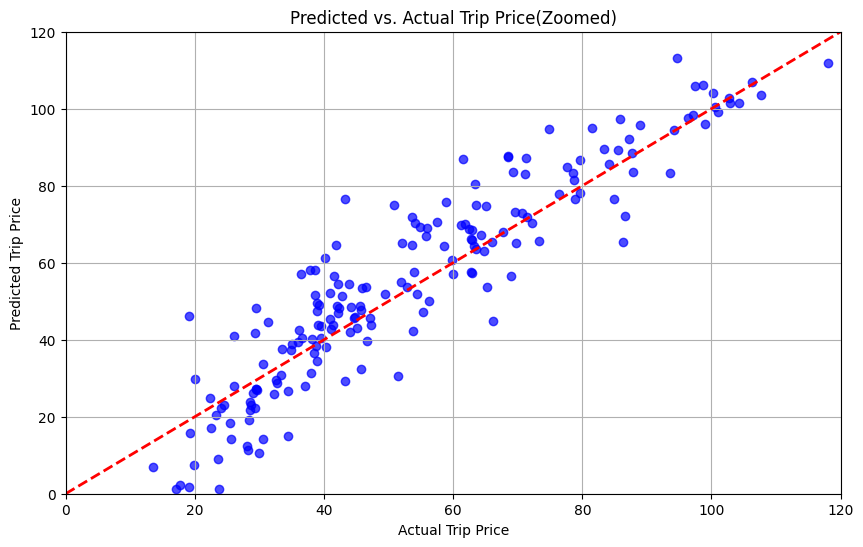

In [103]:
# Plotting the results
plt.figure(figsize=(10, 6))

#  Since we have multiple features, we can't directly plot X_test vs predictions
#  in a simple 2D scatter plot.  Instead, we'll plot predicted vs. actual values.
plt.scatter(y_test, predictions, color='blue', alpha=0.7)

plt.title('Predicted vs. Actual Trip Price(Zoomed)')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.grid(True)

# Set the axis limits to focus on the main cluster of data
max_value = 120 
plt.xlim(0, max_value)  # Set x-axis limits
plt.ylim(0, max_value)  # Set y-axis limits

# Add a diagonal line for reference (perfect predictions)
plt.plot([0, max_value], [0, max_value], 'r--', color='red', linewidth=2)

plt.show()


In [104]:
from sklearn.neighbors import KNeighborsRegressor

modelKNN = KNeighborsRegressor(n_neighbors = 5)
modelKNN.fit(X_train, y_train)

predictions = modelKNN.predict(X_test)

# compute the loss
loss = rmse(y_test, predictions)
print('Loss: ',loss)
# Loss gets increased

Loss:  18.09716308605846


C:\Users\misht\AppData\Local\Temp\ipykernel_8416\3487530189.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, max_value], [0, max_value], 'r--', color='red', linewidth=2)


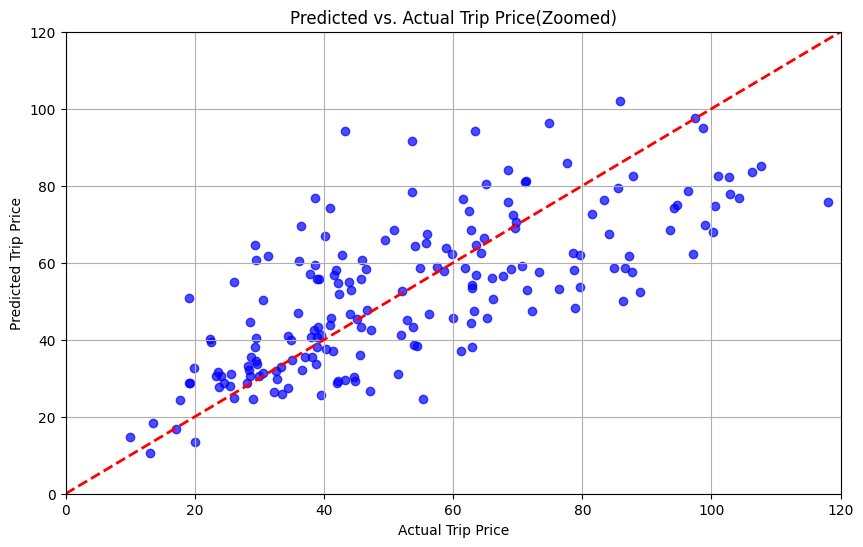

In [105]:
#  Plotting the results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions, color='blue', alpha=0.7)

plt.title('Predicted vs. Actual Trip Price(Zoomed)')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.grid(True)

# Set the axis limits to focus on the main cluster of data
max_value = 120  
plt.xlim(0, max_value)  # Set x-axis limits
plt.ylim(0, max_value)  # Set y-axis limits

# Add a diagonal line for reference (perfect predictions)
plt.plot([0, max_value], [0, max_value], 'r--', color='red', linewidth=2)

plt.show()


In [106]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
model_rf = RandomForestRegressor().fit(X_train, y_train)

# Generate predictions
predictions = model_rf.predict(X_test)

# compute the loss
# loss = rmse(y_test, predictions)
loss = percentage_error(y_test, predictions)
print('Loss: ',loss)
# Loss here is significantly less than the (multi)Linear Regression and KNeighborsRegressor method

Loss:  10.448040103004722


C:\Users\misht\AppData\Local\Temp\ipykernel_8416\1407086142.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, max_value], [0, max_value], 'r--', color='red', linewidth=2)


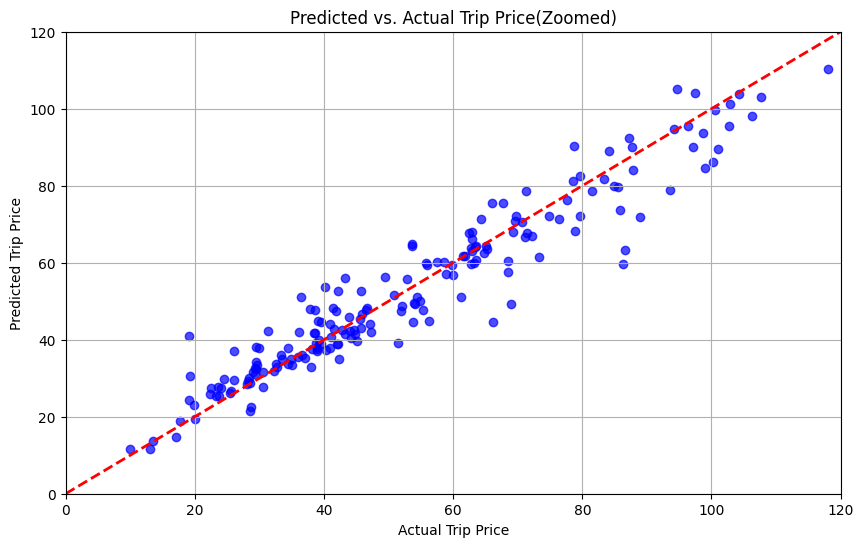

In [118]:
#  Plotting the results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions, color='blue', alpha=0.7)

plt.title('Predicted vs. Actual Trip Price(Zoomed)')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.grid(True)

# Set the axis limits to focus on the main cluster of data
max_value = 120 
plt.xlim(0, max_value)  # Set x-axis limits
plt.ylim(0, max_value)  # Set y-axis limits

# Add a diagonal line for reference (perfect predictions)
plt.plot([0, max_value], [0, max_value], 'r--', color='red', linewidth=2)

plt.show()


# Hyperparameter Tuning using Grid Search Cross-Validation.

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [150, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_absolute_percentage_error',  # Use a scoring function appropriate for MAPE
    n_jobs=-1,  # Use all available cores
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model_rf = grid_search.best_estimator_
y_pred_best = best_model_rf.predict(X_test)
mape_best = percentage_error(y_test, y_pred_best)

print("Best Random Forest MAPE:", mape_best)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Random Forest MAPE: 10.680280299742744
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [113]:
prediction = model_rf.predict([[19.35,2.0,0.0,0.0,3.56,0.80,0.32,53.82,0.0]])
prediction
loss = rmse(36.2624, prediction)
loss

c:\Users\misht\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(0.027157000000030962)